In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#read initial csv into a dataframe
csv_file = 'Main Avocado Tree (Resources)/avocado-updated-2020.csv'
avocado_df = pd.read_csv(csv_file)
avocado_df


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [3]:
#read income csv into a dataframe
csv_income = 'Main Avocado Tree (Resources)/income per metropolitan area.csv'
income_df = pd.read_csv(csv_income)
income_df.head()

,Geography,State,Year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [4]:
#Rename columns to match those in Avocado
rename_income_df = income_df.rename(columns={"Geography": "geography", "Year":"year"})
rename_income_df.head()

,geography,State,year,Per capita personal income
0,Abilene,TX,2017,40876
1,Akron,OH,2017,47522
2,Albany,GA,2017,36780
3,Albany-Lebanon,OR,2017,41169
4,Albany-Schenectady-Troy,NY,2017,56487


In [5]:
#convert date into three columns
split_cols = avocado_df['date'].str.split('-',expand=True)
split_cols.columns = [f'Split-{i}' for i in range(3)]
avocado_df = avocado_df.join(split_cols)
#rename splits to day, month
avocado_df = avocado_df.rename(columns={'Split-1':'month','Split-2':'day'})
#drop Split-0 due to redundancy with year column
avocado_df = avocado_df.drop(['Split-0'], axis=1)
#better geography match
#used https://hassavocadoboard.com/category-data to confirm state match to income data
#Drop Cities with same name, wrong state from income data
#Drop all Springfields except Springfield MA from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'MO')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'IL')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Springfield') & (rename_income_df['State'] == 'OH')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Eugene-Springfield') & (rename_income_df['State'] == ' OR')].index)
#Drop Albanies not NY from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Albany-Lebanon') & (rename_income_df['State'] == ' OR')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Albany') & (rename_income_df['State'] == ' GA')].index)
#Drop all Columbuses not OH from income data
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Columbus') & (rename_income_df['State'] == ' GA-AL')].index)
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Columbus') & (rename_income_df['State'] == ' IN')].index)
#Drop all Jacksonvilles not FL
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Jacksonville') & (rename_income_df['State'] == ' NC')].index)
#Drop all Portlands not OR
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Portland-South Portland') & (rename_income_df['State'] == ' ME')].index)
#Drop all Rochesters not NY
rename_income_df = rename_income_df.drop(rename_income_df[(rename_income_df['geography'] == 'Rochester') & (rename_income_df['State'] == ' MN')].index)

#text to column cities in income and avocado data
columnTOtext1 = rename_income_df['geography'].str.split('-',expand=True)
columnTOtext1.columns = [f'geography-{i}' for i in range(4)]
new_income = rename_income_df.join(columnTOtext1)
new_income = new_income.drop(['geography'], axis=1)
columnTOtext = avocado_df['geography'].str.split('/',expand=True)
columnTOtext.columns = [f'geography-{i}' for i in range(2)]
new_avocado = avocado_df.join(columnTOtext)
new_avocado = new_avocado.drop(['geography'], axis=1)

#keep rows that only have one city
second_cities = new_income['geography-1'].unique()
second_cities = second_cities.tolist()
del second_cities[0]

new_income_first = new_income[~new_income['geography-1'].isin(second_cities)]
new_income_first = new_income_first.drop(['geography-1', 'geography-2', 'geography-3'], axis=1)
#merge data frame based on new_income_first
first = new_avocado.merge(new_income_first, how='inner', on=['geography-0', 'year'])
first_geo_0 = first['geography-0'].unique()
first_geo_0 = first_geo_0.tolist()
first_geo_1 = first['geography-1'].unique()
#remove already merged cities from new_avocado
new_avocado = new_avocado[~new_avocado['geography-0'].isin(first_geo_0)]
#keep rows that only have a two cities
new_income_second = new_income.dropna(subset=['geography-1'])
new_avocado_second = new_avocado.dropna(subset=['geography-1'])
third_cities = new_income_second['geography-2'].unique()
third_cities = third_cities.tolist()
del third_cities[2]

new_income_second = new_income_second[~new_income_second['geography-2'].isin(third_cities)]
new_income_second = new_income_second.drop(['geography-2', 'geography-3'], axis=1)

#merge data frame based on new_income_second
second = new_avocado.merge(new_income_second, how='inner', on=['geography-0', 'year'])
second = second.drop(['geography-1_y'], axis=1)
second = second.rename(columns={'geography-1_x':'geography-1'})
second_geo_0 = second['geography-0'].unique()
second_geo_0 = second_geo_0.tolist()
#remove already merged cities
new_avocado = new_avocado[~new_avocado['geography-0'].isin(second_geo_0)]
#keep rows that only have a three cities
new_income_third = new_income.dropna(subset=['geography-2'])
fourth_cities = new_income_third['geography-3'].unique()
fourth_cities = fourth_cities.tolist()
del fourth_cities[0]

new_income_third = new_income_third[~new_income_third['geography-3'].isin(fourth_cities)]
new_income_third = new_income_third.drop(['geography-3'], axis=1)

#merge dataframes
third = new_avocado.merge(new_income_third, how='inner', on=['geography-0', 'year'])
third = third.drop(['geography-1_y', 'geography-2'], axis=1)
third = third.rename(columns={'geography-1_x':'geography-1'})
third_geo_0 = third['geography-0'].unique()
third_geo_0 = third_geo_0.tolist()
#remove already merged cities
new_avocado = new_avocado[~new_avocado['geography-0'].isin(third_geo_0)]
#keep rows that only have a four cities
new_income_fourth = new_income.dropna(subset=['geography-3'])

#merge dataframes
fourth = new_avocado.merge(new_income_fourth, how='inner', on=['geography-0', 'year'])
fourth = fourth.drop(['geography-1_y', 'geography-2', 'geography-3'], axis=1)
fourth = fourth.rename(columns={'geography-1_x':'geography-1'})

#combine merged dataframes into one
income_avocado = first.append(second)
income_avocado = income_avocado.append(third)
income_avocado = income_avocado.append(fourth)

#get list of cities in dataframe
unique_cities = income_avocado['geography-0'].unique()
unique_cities = unique_cities.tolist()
income_avocado.reset_index()
income_avocado






,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,month,day,geography-0,geography-1,State,Per capita personal income
0,2017-01-01,0.64,329279.29,2646.83,130250.60,2530.91,193850.95,30669.35,163180.08,1.52,conventional,2017,01,01,Cincinnati,Dayton,OH-KY-IN,51844
1,2017-01-01,1.23,10798.25,351.72,8558.19,0.00,1888.34,293.33,1595.01,0.00,organic,2017,01,01,Cincinnati,Dayton,OH-KY-IN,51844
2,2017-01-08,0.82,285027.21,4147.01,126967.13,991.09,152921.98,33746.17,118612.86,562.95,conventional,2017,01,08,Cincinnati,Dayton,OH-KY-IN,51844
3,2017-01-08,1.07,12346.01,323.43,6801.77,0.00,5220.81,654.36,4566.45,0.00,organic,2017,01,08,Cincinnati,Dayton,OH-KY-IN,51844
4,2017-01-15,0.76,346523.78,2939.57,125731.86,994.43,216857.92,29095.07,187759.83,3.02,conventional,2017,01,15,Cincinnati,Dayton,OH-KY-IN,51844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2019-12-15,1.58,7481.67,60.37,891.36,0.00,6529.94,3934.64,2595.30,0.00,organic,2019,12,15,Nashville,None,TN,60680
304,2019-12-22,0.88,210276.00,85573.42,6270.17,329.50,118102.91,96998.28,20685.57,419.06,conventional,2019,12,22,Nashville,None,TN,60680
305,2019-12-22,1.32,10033.83,66.47,698.10,0.00,9269.26,6199.39,3069.87,0.00,organic,2019,12,22,Nashville,None,TN,60680
306,2019-12-29,0.82,230398.16,97961.88,5935.34,219.98,126280.96,107077.99,18849.51,353.46,conventional,2019,12,29,Nashville,None,TN,60680


In [6]:
grouped_by_month_year = pd.DataFrame(income_avocado.groupby(["year", "month"]).mean().round(2))
grouped_by_month_year

average_price  total_volume       4046       4225      4770  \
year month                                                                
2017 01              1.29     376308.81  112735.67  133613.31   7173.86   
     02              1.23     409062.03  129768.58  134894.64  10430.78   
     03              1.43     305419.82   93485.10   97852.05   7183.46   
     04              1.54     331977.00  103059.55  101966.67   7009.93   
     05              1.56     365693.83  116928.87  109506.32   7343.09   
     06              1.57     354778.80  114910.12  102729.29   7487.85   
     07              1.58     322316.32  106815.03  105532.41   7704.80   
     08              1.71     286040.46   97648.55   93063.53   6971.87   
     09              1.85     244014.11   80700.85   85625.06   5484.70   
     10              1.76     251380.65   79548.28   91021.99   5012.90   
     11              1.52     281818.76   96366.22   88016.93   4729.59   
     12              1.37     320039.95  101089.26  113760.01   5624.07   
2018 01              1.37     361467.16  114766.85  126258.77   7006.34   
     02              1.33     426996.66  143152.71  135866.52   7120.30   
     03              1.34     384010.04  117282.95  114231.68   6503.28   
     04              1.33     405262.15  119013.51  129533.98   7222.69   
     05              1.29     460216.01  138971.70  143915.81   7927.74   
     06              1.32     414203.71  128650.75  125882.53   8433.55   
     07              1.34     405341.41  116490.17  127041.42   9417.53   
     08              1.43     364504.69  100872.87  115315.32   8157.07   
     09              1.48     343388.12   95630.83  106312.83   7085.38   
     10              1.35     350968.85   96919.96  105510.09   5970.07   
     11              1.37     303578.68   88266.20   86589.63   5139.56   
     12              1.45     256390.03   78958.67   74020.36   5312.16   
2019 01              1.28     424589.64  119306.53  126892.90   7726.69   
     02              1.20     454263.64  127257.59  134381.92   9416.39   
     03              1.23     425548.34  116377.32  117786.38   9471.03   
     04              1.43     397684.84  104392.90  114153.47  10698.31   
     05              1.54     387991.24  105756.04  112431.31   8013.23   
     06              1.53     371520.90   88244.71  103267.09   8655.97   
     07              1.73     330152.91   77601.23   96206.12   7663.50   
     08              1.61     345771.82   86099.37   88286.10   7233.61   
     09              1.46     367819.58   91415.29   90451.24   5343.00   
     10              1.32     370144.95   83774.27   85185.33   6692.76   
     11              1.29     352043.96   87176.44   74028.66   7159.20   
     12              1.27     333370.58   84710.85   66512.21   6921.19   

            total_bags  small_bags  large_bags  xlarge_bags  \
year month                                                    
2017 01      122785.96    98914.23    22848.99      1022.74   
     02      133968.03   108341.59    23943.36      1683.07   
     03      106899.20    87722.93    17221.03      1955.24   
     04      119940.86    97099.34    20743.03      2098.49   
     05      131915.55   105041.19    24345.43      2528.93   
     06      129651.55   103031.74    23866.21      2753.59   
     07      102260.19    79586.00    19673.69      3000.50   
     08       88355.35    67362.64    18455.88      2536.83   
     09       72202.38    57178.19    13578.34      1445.85   
     10       75796.32    60571.56    14289.43       935.33   
     11       92704.50    71612.30    19692.07      1400.11   
     12       99565.40    79271.62    18779.28      1514.50   
2018 01      113434.76    88205.66    23417.93      1811.17   
     02      140855.92   109194.08    29105.18      2556.66   
     03      145990.21   117417.00    25661.55      2911.67   
     04      149489.84   114444.89    32170.36      2874.59   
     05      169043.00   12

In [7]:
grouped_year_city = pd.DataFrame(income_avocado.groupby(["geography-0", "year"]).mean().round(2))
grouped_year_city

average_price  total_volume       4046      4225     4770  \
geography-0 year                                                              
Albany      2017           1.64      49354.55    1608.51  39712.43   151.47   
            2018           1.45      64017.27    5076.33  47879.76    49.18   
            2019           1.43      62896.96    2294.52  51627.03   135.17   
Atlanta     2017           1.43     271840.75  130942.53  30604.90   225.72   
            2018           1.28     354738.27  157432.63  22102.10   851.46   
...                         ...           ...        ...       ...      ...   
Syracuse    2018           1.22      45978.59    3300.99  22631.68    50.73   
            2019           1.35      43962.57    1790.03  24367.89    46.70   
Tampa       2017           1.62     193869.22  113704.23  27695.45   111.01   
            2018           1.31     273352.89  167546.43  20813.41   710.79   
            2019           1.14     299179.74  117290.64   9835.28  1611.04   

                  total_bags  small_bags  large_bags  xlarge_bags  \
geography-0 year                                                    
Albany      2017     7882.13     4943.01     2763.06       176.07   
            2018    11012.01     8517.80     2337.87       156.34   
            2019     8840.22     5559.95     2983.66       296.63   
Atlanta     2017   110067.61    70132.17    38002.92      1932.52   
            2018   174352.08   116114.02    56468.31      1769.76   
...                      ...         ...         ...          ...   
Syracuse    2018    19995.19    11954.22     8023.63        17.34   
            2019    17754.42    10014.02     7397.11       343.29   
Tampa       2017    52358.53    27810.86    23736.22       811.44   
            2018    84282.25    42565.48    40662.93      1053.84   
            2019   170442.78    65435.71   102824.95      2182.11   

                  Per capita personal income  
geography-0 year                              
Albany      2017                       56487  
            2018                       58443  
            2019                       60767  
Atlanta     2017                       50680  
            2018                       53188  
...                                      ...  
Syracuse    2018                       49954  
            2019                       52051  
Tampa       2017                       45468  
            2018                       47332  
            2019                       48908  

[126 rows x 10 columns]

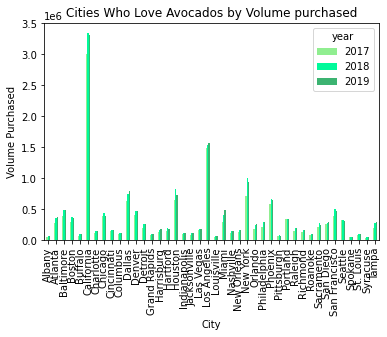

In [8]:
# Question 1: Which cities love avocados most? Arianne
grouped_year_city['total_volume'].unstack().plot(kind='bar', color=('lightgreen', 'mediumspringgreen', 'mediumseagreen'))
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Volume Purchased")
plt.title("Cities Who Love Avocados by Volume purchased")
plt.savefig("Output/Cities_who_love_Avocados.png")
plt.show()
#Task 1: popularity of avocado bar graph of volume purchased per city 

In [9]:
Bad_year= [2017, 2018]
Only_2019 = income_avocado[~income_avocado['year'].isin(Bad_year)]
Only_2019

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,month,day,geography-0,geography-1,State,Per capita personal income
1632,2019-01-07,0.81,381974.08,76483.81,38131.33,9393.38,257965.56,235641.79,21912.15,411.62,conventional,2019,01,07,Cincinnati,Dayton,OH-KY-IN,56033
1633,2019-01-07,1.38,10194.47,189.69,3964.10,0.00,6040.68,2216.06,3824.62,0.00,organic,2019,01,07,Cincinnati,Dayton,OH-KY-IN,56033
1634,2019-01-13,0.86,330737.77,87919.35,27045.13,12076.78,203696.51,183737.47,19522.08,436.96,conventional,2019,01,13,Cincinnati,Dayton,OH-KY-IN,56033
1635,2019-01-13,1.62,12141.70,147.63,3721.23,0.00,8272.84,4186.36,4086.48,0.00,organic,2019,01,13,Cincinnati,Dayton,OH-KY-IN,56033
1636,2019-01-20,0.68,488775.41,69416.24,59350.43,26626.86,333381.88,311968.17,20979.35,434.36,conventional,2019,01,20,Cincinnati,Dayton,OH-KY-IN,56033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2019-12-15,1.58,7481.67,60.37,891.36,0.00,6529.94,3934.64,2595.30,0.00,organic,2019,12,15,Nashville,None,TN,60680
304,2019-12-22,0.88,210276.00,85573.42,6270.17,329.50,118102.91,96998.28,20685.57,419.06,conventional,2019,12,22,Nashville,None,TN,60680
305,2019-12-22,1.32,10033.83,66.47,698.10,0.00,9269.26,6199.39,3069.87,0.00,organic,2019,12,22,Nashville,None,TN,60680
306,2019-12-29,0.82,230398.16,97961.88,5935.34,219.98,126280.96,107077.99,18849.51,353.46,conventional,2019,12,29,Nashville,None,TN,60680


In [10]:
Only_2019 = Only_2019.rename(columns={"geography-0":"city"})

In [11]:
essential_2019 = Only_2019[['city', 'total_volume']]
essential_2019

,city,total_volume
1632,Cincinnati,381974.08
1633,Cincinnati,10194.47
1634,Cincinnati,330737.77
1635,Cincinnati,12141.70
1636,Cincinnati,488775.41
...,...,...
303,Nashville,7481.67
304,Nashville,210276.00
305,Nashville,10033.83
306,Nashville,230398.16


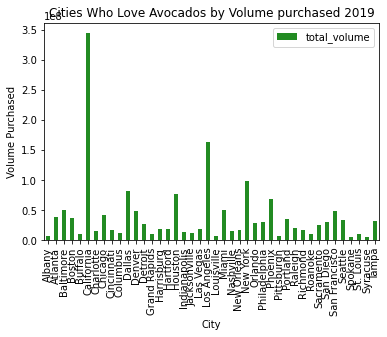

In [12]:
essential_2019.groupby(['city']).sum().plot(kind='bar', color='forestgreen')
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Volume Purchased")
plt.title("Cities Who Love Avocados by Volume purchased 2019")
plt.savefig("Output/2019_loves_only.png")
plt.show()

In [13]:
#read initial csv into a dataframe
csv_file2 = 'Main Avocado Tree (Resources)/worldcities.csv'
pop_df = pd.read_csv(csv_file2)
pop_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
15488,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
15489,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
15490,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159
15491,Nordvik,Nordvik,74.0165,111.5100,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,0.0,1643587468


In [14]:
#Merge the two dataframes together on Geography and year

avocado_pop = pd.merge(Only_2019, pop_df, on=['city'], how='inner')
avocado_pop

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,2019-01-07,0.81,381974.08,76483.81,38131.33,9393.38,257965.56,235641.79,21912.15,411.62,...,Cincinnati,39.1412,-84.5060,United States,US,USA,Ohio,NaN,1648254.0,1840003814
1,2019-01-07,1.38,10194.47,189.69,3964.10,0.00,6040.68,2216.06,3824.62,0.00,...,Cincinnati,39.1412,-84.5060,United States,US,USA,Ohio,NaN,1648254.0,1840003814
2,2019-01-13,0.86,330737.77,87919.35,27045.13,12076.78,203696.51,183737.47,19522.08,436.96,...,Cincinnati,39.1412,-84.5060,United States,US,USA,Ohio,NaN,1648254.0,1840003814
3,2019-01-13,1.62,12141.70,147.63,3721.23,0.00,8272.84,4186.36,4086.48,0.00,...,Cincinnati,39.1412,-84.5060,United States,US,USA,Ohio,NaN,1648254.0,1840003814
4,2019-01-20,0.68,488775.41,69416.24,59350.43,26626.86,333381.88,311968.17,20979.35,434.36,...,Cincinnati,39.1412,-84.5060,United States,US,USA,Ohio,NaN,1648254.0,1840003814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,2019-12-22,1.32,10033.83,66.47,698.10,0.00,9269.26,6199.39,3069.87,0.00,...,Nashville,35.9693,-77.9552,United States,US,USA,North Carolina,NaN,5487.0,1840016167
10188,2019-12-29,0.82,230398.16,97961.88,5935.34,219.98,126280.96,107077.99,18849.51,353.46,...,Nashville,36.1715,-86.7843,United States,US,USA,Tennessee,admin,1076645.0,1840036155
10189,2019-12-29,0.82,230398.16,97961.88,5935.34,219.98,126280.96,107077.99,18849.51,353.46,...,Nashville,35.9693,-77.9552,United States,US,USA,North Carolina,NaN,5487.0,1840016167
10190,2019-12-29,1.20,10132.87,67.47,1017.51,0.00,9047.89,5774.86,3273.03,0.00,...,Nashville,36.1715,-86.7843,United States,US,USA,Tennessee,admin,1076645.0,1840036155


In [15]:
cleaned_avocado_pop = avocado_pop[['month', 'year', 'city', 'population', 'average_price', 'total_volume', '4046', '4225', '4770', 'type']]
cleaned_avocado_pop

,month,year,city,population,average_price,total_volume,4046,4225,4770,type
0,01,2019,Cincinnati,1648254.0,0.81,381974.08,76483.81,38131.33,9393.38,conventional
1,01,2019,Cincinnati,1648254.0,1.38,10194.47,189.69,3964.10,0.00,organic
2,01,2019,Cincinnati,1648254.0,0.86,330737.77,87919.35,27045.13,12076.78,conventional
3,01,2019,Cincinnati,1648254.0,1.62,12141.70,147.63,3721.23,0.00,organic
4,01,2019,Cincinnati,1648254.0,0.68,488775.41,69416.24,59350.43,26626.86,conventional
...,...,...,...,...,...,...,...,...,...,...
10187,12,2019,Nashville,5487.0,1.32,10033.83,66.47,698.10,0.00,organic
10188,12,2019,Nashville,1076645.0,0.82,230398.16,97961.88,5935.34,219.98,conventional
10189,12,2019,Nashville,5487.0,0.82,230398.16,97961.88,5935.34,219.98,conventional
10190,12,2019,Nashville,1076645.0,1.20,10132.87,67.47,1017.51,0.00,organic


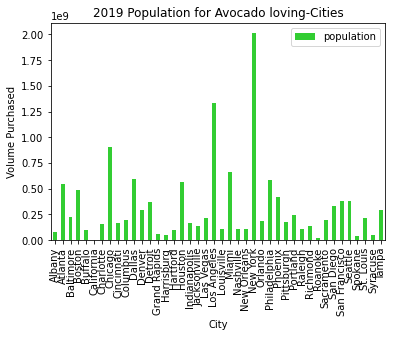

In [16]:
#first look at population sizes:
essential_population = cleaned_avocado_pop[["city", "population"]]
essential_population.groupby(['city']).sum().plot(kind='bar', color='limegreen')
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Volume Purchased")
plt.title("2019 Population for Avocado loving-Cities")
plt.savefig("Output/2019_Population.png")
plt.show()

In [17]:
unique = essential_2019['city'].unique()
unique

array(['Cincinnati', 'Columbus', 'Jacksonville', 'Pittsburgh', 'Richmond',
       'Roanoke', 'St. Louis', 'Syracuse', 'Buffalo', 'California',
       'Grand Rapids', 'Harrisburg', 'Louisville', 'New Orleans',
       'Raleigh', 'Spokane', 'Albany', 'Atlanta', 'Baltimore', 'Boston',
       'Charlotte', 'Chicago', 'Dallas', 'Denver', 'Detroit', 'Hartford',
       'Houston', 'Indianapolis', 'Las Vegas', 'Los Angeles', 'Miami',
       'New York', 'Orlando', 'Philadelphia', 'Phoenix', 'Portland',
       'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 'Tampa',
       'Nashville'], dtype=object)

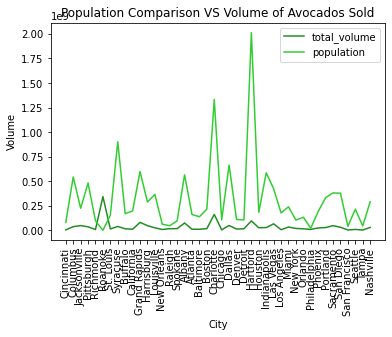

In [18]:
#Side by side comparison
ax = essential_2019.groupby(['city']).sum().plot(color='forestgreen')
essential_population.groupby(['city']).sum().plot(color='limegreen', ax=ax)
plt.xlabel("City")
plt.xticks(np.arange(len(unique)), unique, rotation=90)
plt.ylabel("Volume")
plt.title("Population Comparison VS Volume of Avocados Sold")
plt.savefig("Output/2019_comparison.png")

plt.show()

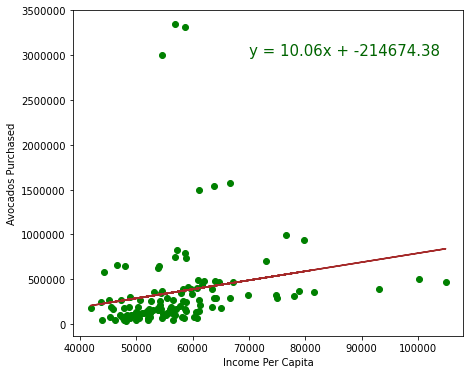

The correlation between both factors is 0.2


In [19]:
#Question 2: Do states with higher income per capita buy more avocados? (income per capita from 2017-2019) Erica
income_avocado_g = income_avocado.groupby(['geography-0', 'year'])
purchased = income_avocado_g['total_volume'].mean()
income = income_avocado_g['Per capita personal income'].mean()

x_values = income
y_values = purchased
(slope, intercept, rvalue, pvalue, stderr) = st.mstats.linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept, 2))
fig, ax1 = plt.subplots()
ax1.scatter(x_values, y_values, color='green')
ax1.plot(x_values, regress_values, color='brown')
ax1.annotate(line_eq,(70000,3000000),fontsize=15,color="darkgreen")
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set_xlabel('Income Per Capita')
ax1.set_ylabel('Avocados Purchased')


fig.set_size_inches(7, 6)
plt.show()
fig.savefig('./Output/IncomevsVolume.png')
correlation = st.mstats.pearsonr(income, purchased)
print(f"The correlation between both factors is {round(correlation[0], 2)}")


#Task 2: line graph (x-values states, y-values income per capita and avocado revenue) 

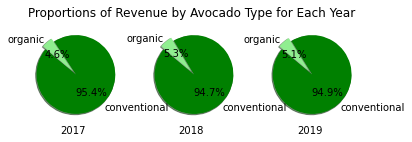

In [20]:
#Question 3: Which type of avocado is the biggest source of revenue for suppliers? Erica

#create revenue column
income_avocado['revenue'] = round(income_avocado['average_price']*income_avocado['total_volume'], 2)

#list of unique years in data
years = income_avocado['year'].unique()
years = years.tolist()
years
#list of unique types in data
types = income_avocado['type'].unique()
types = types.tolist()
#seperate into dataframes for each year
typeANDrevenue_2017 = income_avocado.loc[income_avocado['year']==2017, ['type', 'revenue']]
typeANDrevenue_2018 = income_avocado.loc[income_avocado['year']==2018, ['type', 'revenue']]
typeANDrevenue_2019 = income_avocado.loc[income_avocado['year']==2019, ['type', 'revenue']]
#grouping by type
grouped_2017 = typeANDrevenue_2017.groupby('type')
grouped_2018 = typeANDrevenue_2018.groupby('type')
grouped_2019 = typeANDrevenue_2019.groupby('type')
#sum of revenues
revenues_2017 = grouped_2017.sum()
revenues_2018 = grouped_2018.sum()
revenues_2019 = grouped_2019.sum()
#Task 3: Three pie charts by type (value = revenue) for each year on one png 
colors = ['green', 'lightgreen']
explode = explode = (0.1,0)
#create subplots
figure, (ax1, ax2, ax3) = plt.subplots(1,3,subplot_kw={'aspect':'equal'})
ax1.pie(revenues_2017['revenue'], explode=(0.1,0), labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax2.pie(revenues_2018['revenue'], explode=(0.1,0), labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax3.pie(revenues_2019['revenue'], explode=(0.1,0), labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
#format
ax1.set_xlabel('2017')
ax2.set_xlabel('2018')
ax3.set_xlabel('2019')
ax2.set_title("Proportions of Revenue by Avocado Type for Each Year")

plt.show()
fig.savefig('./Output/RevenueByTypeByYear.png')

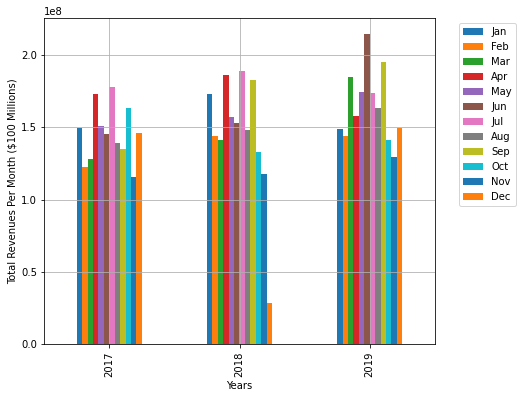

In [21]:
#Question 4: Is there a time of year that sees a spike in revenue? Erica
#create a list of months for setting the month column as categorical type
#'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#use calendar import to map month names to corresponding integer 
income_avocado.sort_values(by="date")
income_avocado.reset_index()
income_avocado['month'] = pd.to_numeric(income_avocado['month'])
income_avocado['day'] = pd.to_numeric(income_avocado['day'])
income_avocado['month'] = income_avocado["month"].apply(lambda x: calendar.month_abbr[x])
months = income_avocado['month'].unique()
months = months.tolist()
#make categorical, so column can be sorted by index of months list
income_avocado['month'] = pd.Categorical(income_avocado['month'], categories=months)

#pivot data, so there's a column for each month, each row has year and sum of revenue column
pd.options.display.float_format = '{:, .2f}'.format
income_avocado_pivot = pd.pivot_table(income_avocado, values='revenue', index='year', columns='month', aggfunc=np.sum)

#plot a bar chart using the pivoted data
ax1 = income_avocado_pivot.plot(kind="bar")
#get a Matplotlib figure from the axes object for formatting purposes
fig = ax1.get_figure()
#change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
#change the axes labels
#ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set_xlabel("Years")
ax1.set_ylabel("Total Revenues Per Month ($100 Millions)")
ax1.legend(fancybox=True, bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.grid(True)
# Use this to show the plot in a new window
plt.show()
# Export the plot as a PNG file
fig.savefig('./Output/RevenueByMonthByYear.png')
#Task 4: bar chart (x-values months, y-values avocado revenue)

In [22]:
#Question 5: How has the average avocado price changed over time?  What is the predicted avocado price for 2021 based on our data? Bitty
#group data by year and create year specific dataframes
data_2017 = income_avocado[income_avocado["year"] == 2017]
month_2017 = pd.DataFrame(data_2017)
month_2017 = pd.DataFrame(data_2017.groupby(["month"]).mean().round(2))
months_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month_2017['month'] = months_list
month_2017 = month_2017[["year", "average_price", "month"]]
month_2017

#Task 5: scatter plot with regression to predict 2021 average price 

ValueError: Invalid format specifier

In [ ]:
#group data by year and create year specific dataframes
data_2018 = income_avocado[income_avocado["year"] == 2018]
month_2018 = pd.DataFrame(data_2018)
month_2018 = pd.DataFrame(data_2018.groupby(["month"]).mean().round(2))
months_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month_2018['month'] = months_list
month_2018 = month_2018[["year", "average_price", "month"]]
month_2018

In [ ]:
data_2019 = income_avocado[income_avocado["year"] == 2019]
month_2019 = pd.DataFrame(data_2019)
month_2019 = pd.DataFrame(data_2019.groupby(["month"]).mean().round(2))
months_list = [1,2,3,4,5,6,7,8,9,10,11,12]
month_2019['month'] = months_list
month_2019 = month_2019[["year", "average_price", "month"]]
month_2019

In [ ]:
#look at bar graphs comparing months
n = 12
width = 0.3
month_names2 = np.arange(n)

bar_2017 = month_2017["average_price"]
bar_2018 = month_2018["average_price"]
bar_2019 = month_2019["average_price"]

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(month_names2+width, bar_2017, width, color='royalblue')
rects2 = ax.bar(month_names2+width, bar_2018, width, color='seagreen')
rects3 = ax.bar(month_names2+width, bar_2019, width, color='g')
plt.ylabel('Average Price (dollars)')
plt.title('Average Avocado Price vs. Month')
labels = ('2017', '2018', '2019')
plt.legend(labels=labels,loc='best')
plt.xticks(month_names2 + width / 2, ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), rotation=90)
plt.savefig('Output/question5graphics.png')
plt.show()

In [ ]:
#create a bar graph comparing prices over the years
df = pd.DataFrame({'2017':bar_2017, '2018':bar_2018, '2019':bar_2019})
df.plot(kind='bar', stacked=False)
plt.title('Average Avocado Price vs. Month')
plt.ylabel('Price (dollars)')

In [ ]:
#create a bar graph for prices vs. month 2017
plt.bar(month_2017['month'], month_2017['average_price'], color='green', alpha=0.75)
plt.title('Average Avocado Price vs. Month 2017')
plt.ylabel('Price (dollars)')
plt.xlabel('months')
plt.savefig('Output/question5graphics1.png')
plt.show()

In [ ]:
#create a bar graph for prices vs. month 2018
plt.bar(month_2018['month'], month_2018['average_price'], color='green', alpha=0.6)
plt.title('Average Avocado Price vs. Month 2018')
plt.ylabel('Price (dollars)')
plt.xlabel('months')
plt.savefig('Output/question5graphics2.png')
plt.show()

In [ ]:
plt.bar(month_2019['month'], month_2019['average_price'], color='green', alpha=0.5)
plt.title('Average Avocado Price vs. Month 2019')
plt.ylabel('Price (dollars)')
plt.xlabel('months')
plt.savefig('Output/question5graphics3.png')
plt.show()

In [ ]:
#show all scatter plots of year vs. average prices
plt.scatter(month_2017['month'], month_2017['average_price'])
plt.scatter(month_2018['month'], month_2018['average_price'])
plt.scatter(month_2019['month'], month_2019['average_price'])
plt.title('Average Price of Avocados vs. Months 2017-2019')
plt.xlabel('Months 2017-2019')
plt.ylabel('average price ($)')
plt.grid()
labels= ('2017', '2018', '2019')
plt.legend(labels=labels,loc='best')
plt.savefig('Output/question5graphicsscatter.png')
plt.show()

In [ ]:
#linear regress 2017
x_values = month_2017['month']
y_values = month_2017['average_price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))

res = st.linregress(month_2017['month'], month_2017['average_price'])
print(f'The r-squared value is: {res.rvalue**2}')
print(f'The r-value is: {res.rvalue}')

plt.scatter(month_2017['month'], month_2017['average_price'], edgecolors='black')
plt.title('Average Price of Avocados vs. Months 2017')
plt.xlabel('Months in 2017')
plt.ylabel('average price ($)')
plt.grid()
plt.annotate(line_eq, (2,1.7), fontsize=12, color='red')
plt.plot(month_2017['month'], res.intercept + res.slope*month_2017['month'], 'r', label='fitted line')
plt.savefig('Output/question5graphicsscatter2017.png')
plt.show()

In [ ]:
#linear regress 2018
x_values = month_2018['month']
y_values = month_2018['average_price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))

res = st.linregress(month_2018['month'], month_2018['average_price'])
print(f'The r-squared value is: {res.rvalue**2}')
print(f'The r-value is: {res.rvalue}')

plt.scatter(month_2018['month'], month_2018['average_price'], edgecolors='black')
plt.title('Average Price of Avocados vs. Months 2018')
plt.xlabel('Months in 2018')
plt.ylabel('average price ($)')
plt.grid()
plt.annotate(line_eq, (2,1.40), fontsize=12, color='red')
plt.plot(month_2018['month'], res.intercept + res.slope*month_2018['month'], 'r', label='fitted line')
plt.savefig('Output/question5graphicsscatter2018.png')
plt.show()

In [ ]:
#linear regress 2019
#Task 5: scatter plot with regression to predict 2021 average price 
x_values = month_2019['month']
y_values = month_2019['average_price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
desired_prediction_month = 5
line_eq = "y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))

res = st.linregress(month_2019['month'], month_2019['average_price'])
print(f'The r-squared value is: {res.rvalue**2}')
print(f'The r-value is: {res.rvalue}')
print(f'Based on our linear regression we expect avocados to cost $ {round((res.slope*desired_prediction_month) + res.intercept, 2)} in May 2021')
plt.scatter(month_2019['month'], month_2019['average_price'], edgecolors='black')
plt.title('Average Price of Avocados vs. Months 2019')
plt.xlabel('Months in 2019')
plt.ylabel('average price ($)')
plt.grid()
plt.annotate(line_eq, (2,1.6), fontsize=12, color='red')
plt.plot(month_2019['month'], res.intercept + res.slope*month_2019['month'], 'r', label='fitted line')
plt.savefig('Output/question5graphicsscatter2019.png')
plt.show()

In [ ]:
#Question 6: Do different types of avocados have different price trends? Arianne

#Task 6: facet (multiple lines on one) line graph (x-values = year, y-values = average price) for each type

In [ ]:
#look at volume for 4046
grouped_by_month_year['4046'].plot(marker='^', color='forestgreen')
plt.xlabel("Month by Year")
plt.xticks(rotation=45)
plt.ylabel("Volume of items purchased")
plt.title("Volume over time for PLU 4046")
plt.savefig("Output/PLU4046.png")
plt.show()

In [ ]:
#look at volume for 4225
grouped_by_month_year['4225'].plot(marker='8', color='lime')
plt.xlabel("Month by Year")
plt.xticks(rotation=45)
plt.ylabel("Volume of items purchased")
plt.title("Volume over time for PLU 4225")
plt.savefig("Output/PLU4225.png")
plt.show()

In [ ]:
#Look at Volume for 4770
grouped_by_month_year['4770'].plot(marker='d', color='mediumseagreen')
plt.xlabel("Month by Year")
plt.xticks(rotation=45)
plt.ylabel("Volume of items purchased")
plt.title("Volume over time for PLU 4770")
plt.savefig("Output/PLU4770.png")
plt.show()

In [ ]:
#Combine single charts into one main comparison chart
grouped_by_month_year['4046'].plot(marker='^', color='forestgreen')
grouped_by_month_year['4225'].plot(marker='8', color='lime')
grouped_by_month_year['4770'].plot(marker='d', color='mediumseagreen')
plt.legend()
plt.title("Volume Comparison over PLU")
plt.xlabel("Month by Year")
plt.xticks(rotation=45)
plt.ylabel("Volume of Items purchased")
plt.savefig("Output/combined_volume.png")
plt.show()